In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
import missingno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import shapiro,mannwhitneyu

In [107]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## **Data overview**

In [108]:
df.shape

(550, 7)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [110]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [111]:
df.isnull().sum()
# No missing values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

### Check duplicates in categorical columns

In [112]:
cols_without_numeric_data = list(df.select_dtypes(exclude=('int64', 'float64','int32','float32')).columns)
print(f'Сolumns without numeric data: {", ".join(cols_without_numeric_data)}.')

Сolumns without numeric data: Name, Author, Genre.


In [113]:
for col in cols_without_numeric_data:
    if df[col].duplicated().any():
        print(f'Column {col} contains duplicates.')
    else:
        print(f"Column {col} doesn't contain duplicates.")

Column Name contains duplicates.
Column Author contains duplicates.
Column Genre contains duplicates.


### Check if the columns contains words in different case and extra spaces.



In [114]:
# Check if spelling errors have been hit
for col in cols_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} - After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Name: 351 - After Name: 350
Before Author: 248 - After Author: 248
Before Genre: 2 - After Genre: 2


There are typing errors in Name column.

In [115]:
df['Name'] = df['Name'].str.title().str.strip()

In [116]:
# Check if the changes have passed
for col in cols_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2


Let's check if there are the same author names but with different spellings.

In [117]:
# Check the column Author
authors = df['Author'].sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

George R. R. Martin, George R.R. Martin and J. K. Rowling, J.K. Rowling have different spellings although they are the same authors.

In [118]:
# Let's build a list of the most similar spellings
matches_author_name = fuzzywuzzy.process.extract('George R.R. Martin', authors, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_author_name

[('George R. R. Martin', 100),
 ('George R.R. Martin', 100),
 ('George Orwell', 53),
 ('Bill Martin Jr.', 52),
 ('Greg Mortenson', 52)]

In [119]:
# Replace the names of the authors with the correct ones
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [120]:
# Check if the changes have passed
for col in cols_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 246 After Author: 246
Before Genre: 2 After Genre: 2


In [121]:
# Check the column Genre
genre = df['Genre'].unique()
genre

array(['Non Fiction', 'Fiction'], dtype=object)

In [122]:
# Check the column Year
years = list(df['Year'].unique())
sorted(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

There may be some duplicate rows in the data. Let's display the last 5 lines of the dataframe.

In [123]:
# Let's display the last 5 lines of the dataframe
df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


It is worth noting that there are duplicate rows in the data, but with different years. Let's remove duplicates. Let's leave the data without years for later analysis.

In [124]:
df = df.drop('Year',axis=1)

In [125]:
df

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction


In [126]:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         361 non-null    object 
 1   Author       361 non-null    object 
 2   User Rating  361 non-null    float64
 3   Reviews      361 non-null    int64  
 4   Price        361 non-null    int64  
 5   Genre        361 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ KB


We received 11 more books than they actually have. We'll find out why duplication occurs.

In [127]:
import collections
count_books = collections.Counter(df['Name'].tolist())
print(count_books.most_common(11))

[('The Help', 3), ('Gone Girl', 2), ("Quiet: The Power Of Introverts In A World That Can'T Stop Talking", 2), ('The 5 Love Languages: The Secret To Love That Lasts', 2), ('The 7 Habits Of Highly Effective People: Powerful Lessons In Personal Change', 2), ('The Fault In Our Stars', 2), ('The Girl On The Train', 2), ('The Immortal Life Of Henrietta Lacks', 2), ('To Kill A Mockingbird', 2), ('Unbroken: A World War Ii Story Of Survival, Resilience, And Redemption', 2), ('10-Day Green Smoothie Cleanse', 1)]


Let's check with a random example.

In [128]:
df[df['Name']=='The Help']

,Name,Author,User Rating,Reviews,Price,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,Fiction


Records are duplicated by price. Apparently, in different years the book costs differently, which is quite logical taking into account inflation, demand, etc. Let's leave only the last entries.

In [129]:
df = df.drop_duplicates(subset='Name', keep='last')
df

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction


### The data contains 350 different books written by 246 authors. All books are presented in two categories (Non Fiction, Fiction).

### **Q1: Which author's books receive the highest average rating (top authors).**

In [130]:
top_10_authors = df.groupby('Author')[['User Rating']].mean().sort_values('User Rating',ascending=False).head(10).reset_index()

In [131]:
top_10_authors

,Author,User Rating
0,Nathan W. Pyle,4.9
1,Patrick Thorpe,4.9
2,Eric Carle,4.9
3,Emily Winfield Martin,4.9
4,Chip Gaines,4.9
5,Jill Twiss,4.9
6,Rush Limbaugh,4.9
7,Sherri Duskey Rinker,4.9
8,Alice Schertle,4.9
9,Pete Souza,4.9


### **Q2: Which author has written the most bestsellers (top authors).**

In [132]:
num_of_books_written = df.groupby('Author')[['Name']].count().sort_values('Name',ascending=False).head(10).reset_index()

In [133]:
num_of_books_written

,Author,Name
0,Jeff Kinney,12
1,Rick Riordan,10
2,J.K. Rowling,8
3,Stephenie Meyer,7
4,Dav Pilkey,6
5,Bill O'Reilly,6
6,John Grisham,5
7,E L James,5
8,Suzanne Collins,5
9,Charlaine Harris,4


In [134]:
books_with_num_of_reviews = df.groupby('Name')[['Reviews']].sum().sort_values('Reviews',ascending=False).head(10).reset_index()

In [135]:
books_with_num_of_reviews

,Name,Reviews
0,Where The Crawdads Sing,87841
1,The Girl On The Train,79446
2,Becoming,61133
3,Gone Girl,57271
4,The Fault In Our Stars,50482
5,The Nightingale: A Novel,49288
6,Fifty Shades Of Grey: Book One Of The Fifty Sh...,47265
7,The Martian,39459
8,All The Light We Cannot See,36348
9,The Alchemist,35799


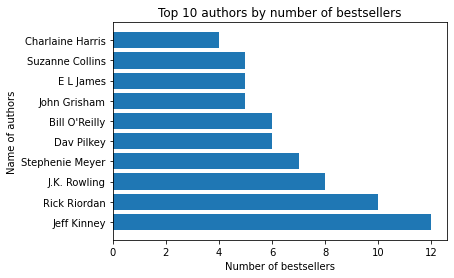

In [136]:
plt.barh(num_of_books_written['Author'],num_of_books_written['Name'])
plt.title('Top 10 authors by number of bestsellers')
plt.xlabel('Number of bestsellers')
plt.ylabel('Name of authors')
plt.show()

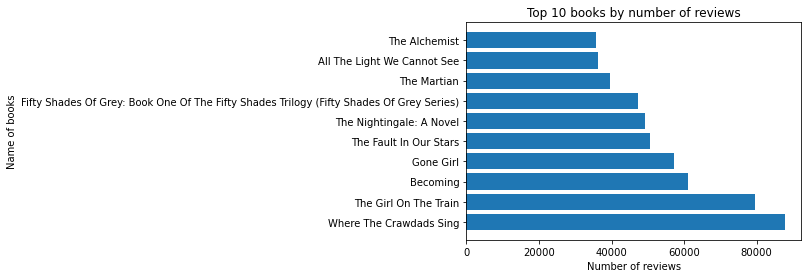

In [137]:
plt.barh(books_with_num_of_reviews['Name'],books_with_num_of_reviews['Reviews'])
plt.title('Top 10 books by number of reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Name of books')
plt.show()

### **Q3: Which genres become bestsellers more often?**

In [138]:
num_of_books_by_genre = df.groupby('Genre')[['Name']].count().sort_values('Name', ascending=False).head(10).reset_index()
num_of_books_by_genre

,Genre,Name
0,Non Fiction,190
1,Fiction,160


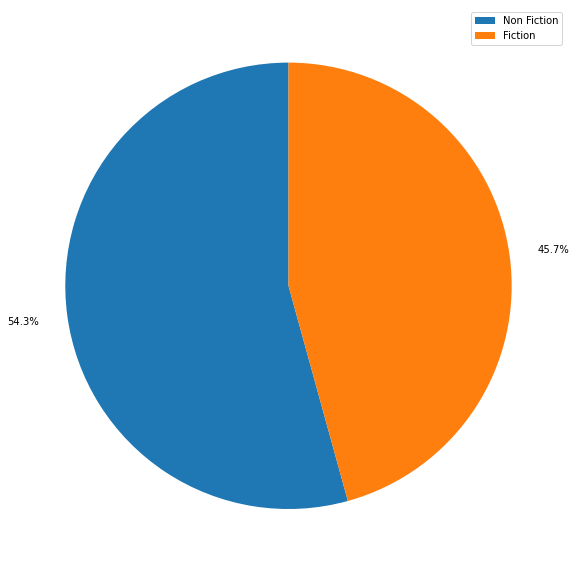

In [139]:
plt.figure(figsize=(10,12))
plt.pie(num_of_books_by_genre['Name'],autopct='%.1f%%',startangle=90,pctdistance=1.2)
plt.legend(loc='upper right',labels=num_of_books_by_genre['Genre'].value_counts().index)

Non-fiction is more likely to become a bestseller.

### About numerical data

In [140]:
col_dict = {'User Rating':1, 'Reviews':2, 'Price':3}

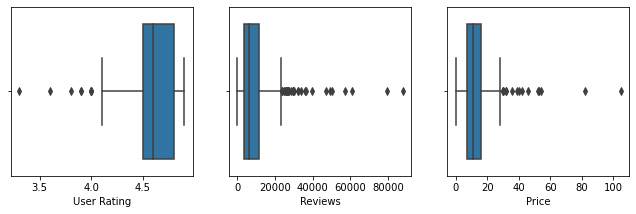

In [141]:
plt.figure(figsize=(15,18))

for x,i in col_dict.items():
    plt.subplot(5,4,i)
    sns.boxplot(x=df[x])
    
plt.show()

In [142]:
df.describe()

,User Rating,Reviews,Price
count,350.000000,350.000000,350.000000
mean,4.608857,9804.605714,12.925714
std,0.226993,10885.017686,10.003161
min,3.300000,37.000000,0.000000
25%,4.500000,3435.250000,7.250000
50%,4.600000,6328.000000,11.000000
75%,4.800000,11510.250000,16.000000
max,4.900000,87841.000000,105.000000


### **User Rating**
1. Data is not distributed normally. Asymmetry is observed.
2. Average and median book ratings are 4.6.
3. There are outliers in the data. There are a small number of books in the data below the 4.1 rating.
### **Reviews**
1. Data is not distributed normally. Asymmetry is observed.
2. The data has a wide range.
3. There are outliers in the data. There are a small number of books receiving reviews well above the 75 percentile.
### **Price**
1. Data is not distributed normally. Asymmetry is observed.
2. There are books that cost much higher than the average, as well as books with a cost of 0, which is strange.There are books that cost much higher than the average, as well as books with a cost of 0, which is strange. Either the book is given for free or this error.

In [143]:
# Correlation
df.corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.055478,-0.028228
Reviews,-0.055478,1.000000,-0.045705
Price,-0.028228,-0.045705,1.000000


<AxesSubplot:>

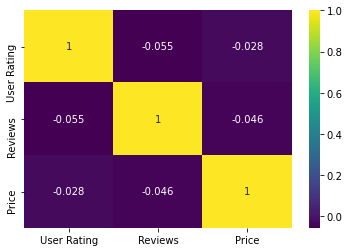

In [144]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

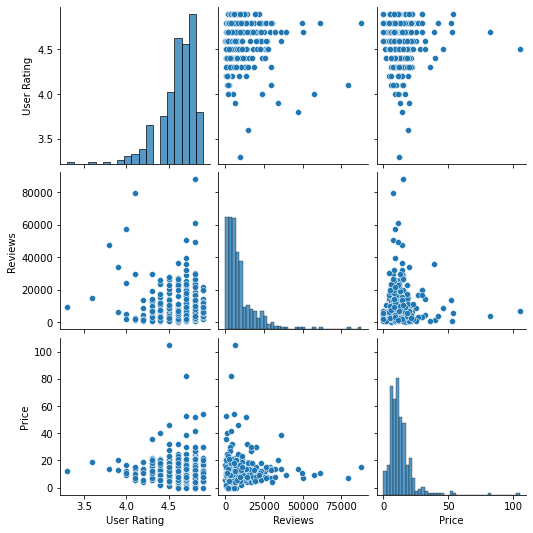

In [145]:
sns.pairplot(df,kind='scatter')

Based on the constructed correlation matrix as well as the constructed visualizations, it can be seen that the data does not contain any positive or negative linear relationship between the rating, reviews and the price of books.

## **Hypothesis testing**

### We're going to test:
H0: There are no differences between genre racketeering

H1: There are differences between genre racketeering

### Checking the distribution for normality

In [146]:
alpha = 0.05
stat, pval = shapiro(df['User Rating'])
print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
if pval > alpha:
    print('Accept H0 - Data is distributed normally.')
if pval < alpha:
    print('Reject H0 - Data is not distributed normally.')

Statistic: 0.877
P-Value: 0.00000000000000045166
Reject H0 - Data is not distributed normally.


### Form samples for testing

In [147]:
non_fiction = df[df['Genre'] == 'Non Fiction']['User Rating']
fiction = df[df['Genre'] == 'Fiction']['User Rating']

### Testing

In [148]:
alpha=0.05

stat, pval = mannwhitneyu(non_fiction, fiction)

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')

if pval > alpha:
    print('Accept H0 - There is no significant difference between the groups.')
if pval < alpha:
    print('Reject H0 - There are significant differences between the groups.')

Statistic: 13013.000
P-Value: 0.00931903468696572077
Reject H0 - There are significant differences between the groups.


In [149]:
print(f'Non_fiction median: {non_fiction.median()}, Fiction median: {fiction.median()}')

Non_fiction median: 4.6, Fiction median: 4.7


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



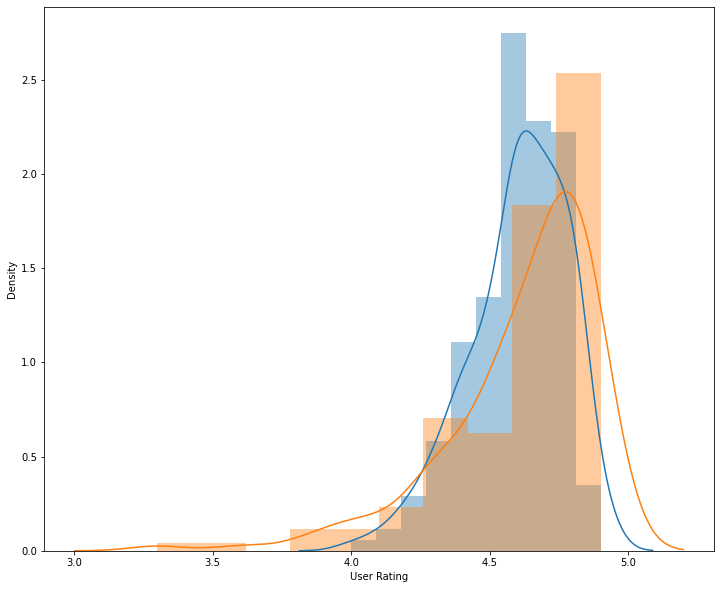

In [150]:
plt.figure(figsize=(12,10))
sns.distplot(non_fiction,hist=True,kde=True,bins=10)
sns.distplot(fiction,hist=True,kde=True,bins=10)
plt.show()

As a result of the testing, statistically significant differences were obtained between the compared groups. Based on the results obtained, it can be argued that users evaluate books differently depending on the genre, and based on the median values, readers give preference to works of fiction.

### In this notebook, it was established which authors receive the highest ratings from readers, which authors have written the most bestsellers, which books receive the most reviews from readers. In addition, it was found that non-fiction literature is becoming more often a bestseller, but users also like fiction more, which is confirmed by the statistically significant results obtained during the testing.